<a href="https://colab.research.google.com/github/mpfoster/Biochem5721/blob/master/Intro_plotting_python_6765_SP21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to using Python for Biochem 6765 - SP21; Foster

_2021-01-04 MPF_

This notebook is intended to serve as a tutorial guide for introducing students to data plotting and fitting in Python. It is by no means a complete description of capabilities or possibilities for data analysis in Python, but hopefully provides some useful guides and examples. 

Although you might consider installing JupyterLab on your computer (See [jupyter.org](https://jupyter.org/)), for starters you can create your first Jupyter notebooks using [Google Colab](https://colab.research.google.com/); this does require that you have a GMail. Your work will be automatically saved to your Google Drive space. 

Students should use the code cells as a guide, and feel free to copy/paste into their notebooks. The effect of editing the code can be seen by re-running the selected cell. Note that some cells will depend on execution of earlier cells ,though. In any case, the output fields should be cleared when starting this tutorial so that you can progress through it sequentially. This can be done at any time in Colab, via Tools > Command Palette > Clear all outputs.

---



## Markdown
This is a Markdown cell in a [Jupyter](https://jupyterlab.readthedocs.io/) notebook. [Markdown](https://guides.github.com/features/mastering-markdown/) is an easy-to-type formatting language that is interpreted into HTML to generate nice formatting withought having to learn and type html code, like `<i>`*for italics*`</i>`.


# This is a heading
## This is a subheading

Text can be **bold**, __bolded__, *italics*, _italicized_, and formatted to look like `code`, rendered as a $\frac{Latex}{equation}$, as well as other options.

Check out the [markdown cheat-sheet](https://www.markdownguide.org/cheat-sheet) for formatting tips.

## Code Cells
We can perform mathematical operations using the Python language in "code" cells. Code cells can have commands to be interpreted by the Python engine, or comments (commenting code is very good practice!). Coments begin with "#", or are breacketed by triple quotes.

In [ ]:
# This is a comment in code cell; it's preceded by "#"
'''
This is also a comment; note the triple quotes
Code cells can be *run* by typing Ctrl/Cmd-Enter, or by clicking on the 
"Play" icon in the top-left corner
The following, is a mathematical operation that results in a simple output upon
executing the code by running the cell.
'''
5+3

8

In Python, we can declare and assign values to them as we need them:

In [ ]:
a = 5+3   # this assigns to the variable a, the sum of 5 and 3
a # a variable by itself as the last line of a code cell prints its value:

8

Then perform operations with the declared variable:

In [ ]:
a**2  # this how we raise a number to an exponent in Python

64

Some operations you might want to perform are not included in "standard" python, but can be _imported_ from add-on _packages_, or code _libraries_. For example, we could take the square root by raising $a$ to the 1/2 power: `a**0.5` 

In [ ]:
a**0.5

2.8284271247461903

Or, by calling a function that someone else has written, called `sqrt`. We will gain access to this function by importing it from a library. We call the function by name, and provide the function with the necessary input in parentheses:

In [ ]:
from numpy import sqrt
sqrt(a)

2.8284271247461903

We can also import an entire library, a couple of different ways: (1) `from numpy import *` will import all code in the library and be directly callable; or, (2) `import numpy` or `import numpy as np`, will import the library, but accessing the functions requires the use of a prefix, in the second case `np`. The advantage of the second option is that we might inadvertently import from two libraries, functions that have the same name.

In [ ]:
import numpy as np
np.sqrt(a)

2.8284271247461903

## Formatted printing 
Taking `sqrt(8)` generates a value with a lot of decimal places! Let's say we only care about the first two (hundred's) we can format the output using a formatted print statement:

In [ ]:
# formatted printing
print("The square root of %.f is: %5.2f" % (a,sqrt(a))) 

The square root of 8 is:  2.83


In the formatted print statement the two instances of `%` indicate we are expecting two variables, which are passed as a list `% (a, sqrt(a))`. The text `%5.2f` says to represent a number as a floating point decimal with 5 characters, including the point and two digits to the right of the decimal; rounding happens after the 2nd decimal. 

There's a second ("Pythonic") way to format printed text:

In [ ]:
# C-like formatting statements:
print("The volume of a sphere with a radius r = %d is 4/3πr^3 = %5.2f" % (a, 4*np.pi*a**3/3))

# Python way of formatting text:
print("The volume of a sphere with a radius r = {0:d} is 4/3πr^3 = {1:5.2f}".format(a, 4*np.pi*a**3/3))

The volume of a sphere with a radius r = 8 is 4/3πr^3 = 2144.66
The volume of a sphere with a radius r = 8 is 4/3πr^3 = 2144.66


## Lists and Arrays
In Python, list elements are indexed from 0, not 1. So the third element of a list would be #2, and we access it using the list name and square brackets: `name[i]`

In [ ]:
my_list = 'first', 'second', 'third', 'fourth'
my_list[2]

'third'

# Plotting a function using Numpy and Matplotlib
Several plotting and graphics libraries are available in Python, but [Matplotlib](https://matplotlib.org/) is powerful and the most common.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

We can plot a function by generating synthetic $x$ values and computing corresponding $y$ values. Numpy's `linspace` [(docs)](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) will generate (by default 50) evenly spaced values between the two indicated bounds, inclusive).

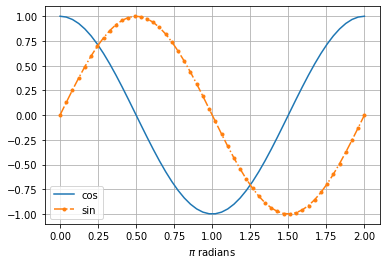

In [ ]:
x = np.linspace(0,2) # generates an array of x values between 0 and 2pi
plt.plot(x,np.cos(x*np.pi), label='cos') 
plt.plot(x,np.sin(x*np.pi),'.-.', label='sin')
plt.xlabel('$\pi$ radians')
plt.grid(); plt.legend(); plt.show()

## Simple plotting and fitting with Python, using matplotlib and pandas
We will start with a cooperative isotherm of oxygen binding to hemoglobin. The data as follows, in which the first column is oxygen partial pressure (in mmHg), and the second is fractional saturation:

|$P(O_2)$ | Y |
| --- | --- |
|0.499	|0.000|
|1.341	|0.015|
|2.106	|0.030|
|5.345	|0.146|
|7.934	|0.316|
|11.132	|0.505|
|14.761	|0.644|
|18.499	|0.760|
|25.233	|0.919|
|64.028	|0.995|


We plot the data using `matplotlib` https://matplotlib.org/ (a library with functionality similar to that of MATLAB), we define _x_ and _y_ data. This can be done manually, as ...

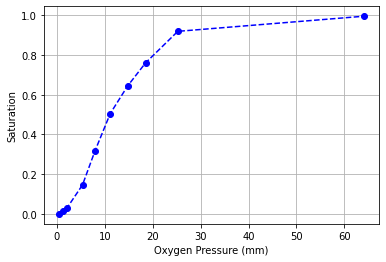

In [ ]:
# the x and y data: 
x = [0.499,  1.341,  2.106,  5.345,  7.934,  11.132,  14.761,  18.499, 
     25.233, 64.028]
y = [0.0, 0.015, 0.03, 0.146, 0.316, 0.505, 0.644, 0.76, 0.919, 0.995]
plt.plot(x,y, 'bo--') # 'bo--' means *b*lue 'o's and dashes
plt.xlabel('Oxygen Pressure (mm)'); plt.ylabel('Saturation')
plt.grid(); plt.show()

## Loading tabular data with Pandas
Above, we specified the _x_ and _y_ data as two lists. Usually, our data is tabulated in some file which we could read in to Python, instead of entering the list of values. We can most easily read in the data using the [Pandas package](https://pandas.pydata.org/). Pandas simplifies loading tabular data into a "data frame"; basically a table with rows and columns. For this example, the data are available on the web as a space-separated text file, at [this link]( https://github.com/mpfoster/Biochem6765/blob/master/data/hb+o2.txt). The first line of the file is a comment, so we need to tell pandas to ignore lines that start with `comment='#'`, that the separator between fields is blank space `sep='\s+'`, and that the file does not have a reader row with properly formatted column names, `header=None`.

(In addition to space, or tab-delimited files, pandas has utilites for reading `.csv` files (comma-separated-values; probably the most common), and can diretly read data from _Excel_ spreadsheets, or even on-line Google spreadsheets. See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html))

In [ ]:
# use pandas to load the data from a url
import pandas as pd
df = pd.read_table(
    "https://www.asc.ohio-state.edu/foster.281/gnuplot/gnuplot_tutorial1_files/hb+o2.txt",
    sep='\s+', header=None, comment='#')
df.columns = ['PO2','Ys']  # rename columns; 0: oxygen pressure; 1: saturation
df  # print out the data frame

,PO2,Ys
0,0.499,0.000
1,1.341,0.015
2,2.106,0.030
3,5.345,0.146
4,7.934,0.316
5,11.132,0.505
6,14.761,0.644
7,18.499,0.760
8,25.233,0.919
9,64.028,0.995


and... easily plot the data using either (1) the pyplot funtions of matplotlib, or (2) built-in plotting functions of a pandas data frame [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot):

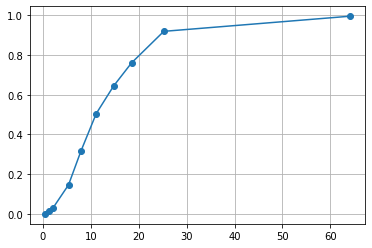

In [ ]:
# (1) using pyplot; x and y by column name
plt.plot(df['PO2'], df['Ys'], 'o-'); plt.grid()

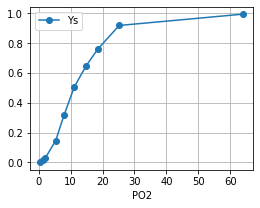

In [ ]:
# (2) using built-in pandas plot functions:
df.plot('PO2', 'Ys', style='o-', figsize=(4,3))
plt.grid() # plot the data using a scatter plot

NB: we can convert a column in a data frame to a list:

In [ ]:
df['Ys'].tolist() # print a column as a list

[0.0, 0.015, 0.03, 0.146, 0.316, 0.505, 0.644, 0.76, 0.919, 0.995]